**Kod jako dodatek do raportu - Team nr 3**

Kod pomocniczy z zajęć:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()

In [ ]:
hic = np.load("hic_100.npy")

In [ ]:
hic.shape

(150, 150)

<Axes: >

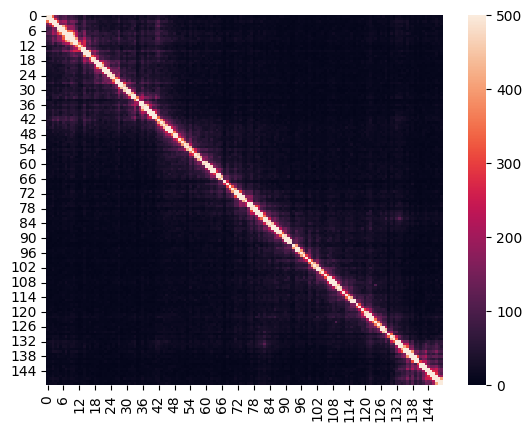

In [ ]:
sns.heatmap(hic, vmax=500)

<AxesSubplot:>

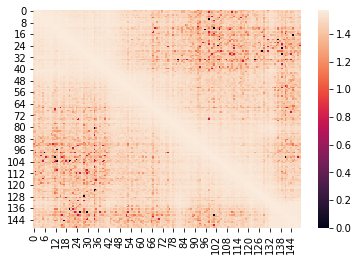

In [ ]:
sns.heatmap(np.arctan(hic))

In [ ]:
dfV = pd.read_csv("d10_V.csv")

In [ ]:
dfV.shape

(2488, 10)

In [ ]:
dfV.head()

,Unnamed: 0,id,x,y,z,i,j,k,degree,to_remove
0,2343,0.0,260.0,357.957167,32.659863,52.0,71.591433,1.088662,3.0,False
1,2383,1.0,240.0,392.598183,32.659863,48.0,78.519637,1.088662,3.0,False
2,2384,2.0,280.0,392.598183,32.659863,56.0,78.519637,1.088662,4.0,False
3,2425,3.0,260.0,427.239199,32.659863,52.0,85.447840,1.088662,2.0,False
4,4229,4.0,260.0,334.863156,65.319726,52.0,66.972631,2.177324,2.0,False


In [ ]:
dfE = pd.read_csv("d10_E.csv")

In [ ]:
dfE.head()

(9524, 7)

In [ ]:
def proponuj_g(struktura, G):
    """
    struktrua = [(x0,y0,z0), ...]
    struktura = [id0, id1, ...]
    G - graf csv, (networkx)
    """
    
    return [ps0, ps1, ...]

def podobienstwo_f(struktura, mapa_hic):
    """
    oblicza stopień podobieństwa pomiędzy mapą dystansów a mapa hic
    pearson, 
    """
    
    return podobienstwo
    

    

**Nasz właściwy kod:**

Pomocnicze funcje potrzebne do wizualizacji:

In [ ]:
!pip install git+https://bitbucket.org/4dnucleome/points_io.git
from points_io import save_points_as_pdb

In [ ]:
def list_to_graph(lista, G):
    prev = None
    
    graph_from_list = nx.Graph()
    G_nodes_info = []
    G_nodes_info = list(G.nodes(data=True))
    
    for elem in lista:
        node_id = G_nodes_info[int(elem)][0]
        x = G_nodes_info[int(elem)][1]['x']
        y = G_nodes_info[int(elem)][1]['y']
        z = G_nodes_info[int(elem)][1]['z']
        graph_from_list.add_node(node_id, x=x, y=y, z=z)
        
        if(prev is not None):
            prev_id = G_nodes_info[int(prev)][0]
            graph_from_list.add_edge(int(prev_id), int(node_id), weight = 1)
        
        prev = elem
    return graph_from_list

In [ ]:
def save_to_chimera(struktura, name, G):
    N = list_to_graph(struktura, G)
    list_of_nodes = list(N.nodes(data=True))
    data = []
    
    for elem in list_of_nodes:
        x = elem[1]['x']
        y = elem[1]['y']
        z = elem[1]['z']
        data.append([x, y, z])

    save_points_as_pdb(data, name)

Tworzenie grafu G z pomocą networkx

In [ ]:
import pandas as pd
import networkx as nx
import random

# Tworzenie grafu G na podstawie danych w DataFrame dfE
G = nx.Graph()

# Dodanie wierzchołków do grafu
for _, row in dfV.iterrows():
    G.add_node(row["id"], x=row["x"], y=row["y"], z=row["z"])

# Dodanie krawędzi do grafu
for _, row in dfE.iterrows():
    G.add_edge(int(row["id1"]), int(row["id2"]), weight=row["weight"])

# Wyświetlenie informacji o grafie
struktura = dfV['id'].tolist()

In [ ]:
def zapisz_jako_liste_wspolrzednych(graph):
    """
    Zapisuje dane grafu o wierzchołkach jako listę współrzędnych.
    :param graph: Graf pakietu networkx.
    :return: Lista współrzędnych wierzchołków.
    """
    lista_wspolrzednych = []

    for wierzcholek, atrybuty in graph.nodes(data=True):
        wspolrzedne = [atrybuty['x'], atrybuty['y'], atrybuty['z']]
        lista_wspolrzednych.append(wspolrzedne)

    return lista_wspolrzednych

# Zapisanie danych grafu jako listy współrzędnych
punkty = zapisz_jako_liste_wspolrzednych(graph)
punkty

Część 1 - Funkcja f

In [ ]:
from scipy.interpolate import CubicSpline

def evenly_distribute_points(points, num_new_points):
    """
    Evenly distributes points along a path by adding new points.
    :param points: List of points [a, b, c] with three-dimensional coordinates [x, y, z].
    :param num_new_points: Number of new points to add between existing points.
    :return: List of points after evenly distributing.
    """
    num_points = len(points)
    
    # Extract x, y, z coordinates from the given points
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]
    
    # Compute parameter values for interpolation
    t = range(num_points)
    t_interp = [i * (num_points - 1) / float(num_points + num_new_points - 1) for i in range(num_points + num_new_points)]
    
    # Perform cubic spline interpolation for each coordinate separately
    interp_x = CubicSpline(t, x)(t_interp)
    interp_y = CubicSpline(t, y)(t_interp)
    interp_z = CubicSpline(t, z)(t_interp)
    
    # Combine interpolated coordinates into new points
    new_points = [[interp_x[i], interp_y[i], interp_z[i]] for i in range(num_points + num_new_points)]
    
    return new_points

In [ ]:
from scipy.spatial import distance_matrix

def create_hic_map(points):
    """
    Creates a Hi-C map from the coordinates of points in 3D.
    :param points: List of points with 3D coordinates [x, y, z].
    :return: Hi-C map as a 2D numpy array.
    """
    distances = distance_matrix(points, points)
    return distances

hic2 = create_hic_map(nowe_punkty)

# Display the Hi-C map
print(hic2)

In [ ]:
from scipy.ndimage import zoom

def reduce_hic_dimension(matrix, target_shape):
    original_shape = matrix.shape
    if original_shape[0] <= target_shape[0] or original_shape[1] <= target_shape[1]:
        raise ValueError("Target shape must be smaller than the original matrix shape")

    zoom_factor = (target_shape[0] / original_shape[0], target_shape[1] / original_shape[1])
    reduced_matrix = zoom(matrix, zoom_factor, order=1)

    return reduced_matrix

hic2 = reduce_hic_dimension(hic2, (150, 150))

In [ ]:
import numpy as np
from scipy.stats import pearsonr

def porownaj_odleglosci(macierz_hic1, macierz_hic2):
    """
    Porównuje odległości między dwiema macierzami Hi-C przy użyciu korelacji Pearsona.
    :param macierz_hic1: Pierwsza macierz Hi-C (numpy array).
    :param macierz_hic2: Druga macierz Hi-C (numpy array).
    :return: Korelacja Pearsona między macierzami Hi-C.
    """
    # Spłaszczenie macierzy
    spłaszczona_hic1 = macierz_hic1.flatten()
    spłaszczona_hic2 = macierz_hic2.flatten()

    # Obliczanie korelacji Pearsona
    korelacja, _ = pearsonr(spłaszczona_hic1, spłaszczona_hic2)

    return korelacja


# Porównanie odległości między macierzami Hi-C
korelacja = porownaj_odleglosci(hic, hic2)

# Wyświetlanie wyniku
print("Korelacja Pearsona między macierzami Hi-C:", korelacja)

In [ ]:
# Musimy posiadać pobrane:
# G - graf na którym się opieramy
# dfV - vertexy

def podobienstwo_f(struktura, hic):
    # Ze struktury tworzymy graf (zakładając odgórnie
    # znajomość grafu G na którym się opieramy)
    graf = list_to_graph(struktura, G)
    
    # Z grafu wyciągamy listę współrzędnych kolejno 
    # podanych punktów w strukturze
    punkty = zapisz_jako_liste_wspolrzednych(graf)
    
    # Punkty w grafie nie odpowiadają naszym wymiarom
    # przez co nakładamy równomiernie po ścieżce nowe
    # punkty (ma być ich dfV - tyle ile ma początkowa
    # struktura do której się porównujemy)
    ile_nowych = len(dfV) - len(punkty)
    nowe_punkty = evenly_distribute_points(punkty, ile_nowych)
    
    # Tworzymy mapę Hi-C z nowych punktów
    hic2 = create_hic_map(nowe_punkty)
    
    # Zamieniamy wymiary nowo postałej mapy Hi-C, aby
    # odpowiadała wymiarom interesującej nas mapy.
    dimensions = hic.shape
    hic2 = reduce_hic_dimension(hic2, dimensions)
    
    # Dokonujemy porównania naszych macierzy
    # a następnie zwracamy wynik korelacji pearsona
    korelacja = porownaj_odleglosci(hic, hic2)
    return f"Korelacja Pearsona wynosi: {korelacja}"

Część 2- Funkcja g

Poczatkowo towrzymy funkcję generuj_struktura2, która wybiera losową krawędź w grafie

In [ ]:
def generuj_struktura2(G):
    # Wylosuj losowy wierzchołek początkowy
    start_node = random.choice(list(G.nodes()))
    while len(list(G.neighbors(start_node)))<1:
      start_node = random.choice(list(G.nodes()))
    
    # Zainicjuj ścieżkę
    path = [start_node]
    # Wybierz losowego sąsiada  wierzchołka
    current_node = path[-1]
    neighbors = list(G.neighbors(current_node))
    random.shuffle(neighbors)
        
    # Dodaj do ścieżki losowego sąsiada
    path.append(neighbors[0])
            
    return path

Tworzymy funkcje do 3 możliwych sposobów rozwiązania struktury (przedluz, usun_ost, zamien_na_dwa):

In [ ]:
def przedluz(struktura, G):
  # Wybieramy wierzchołek ostatni w ścieżce
    v = struktura[-1]
    # Sprawdzamy połączone z nim wierzchołki, które nie są w strukturze
    nie_odwiedzone = [u for u in G.neighbors(v) if u not in struktura]
    nowa_struktura=struktura
    # jeśli takie nie istnieją to nie pójdziemy dalej
    if len(nie_odwiedzone) != 0:
        # Szukamy najbliższego nieodwiedzonego
        min_distance = float("inf")
        nowy=0
        for u in nie_odwiedzone:
              distance = (G.nodes[v]['x']-G.nodes[u]['x'])**2+(G.nodes[v]['y']-G.nodes[u]['y'])**2+(G.nodes[v]['z']-G.nodes[u]['z'])**2
              if distance < min_distance:
                  min_distance = distance
                  nowy = u
        nowa_struktura = struktura + [nowy]
    return nowa_struktura


In [ ]:
def usun_ost(struktura, G):
    nowa_struktura = struktura[:-1]
    return nowa_struktura


In [ ]:
def zmien_na_dwa(struktura, G):
    nowa_struktura=struktura
    i=random.randint(0, len(struktura)-2)
    node_a=struktura[i]
    node_b=struktura[i+1]
    common_neighbors = set(G.neighbors(node_a)) & set(G.neighbors(node_b))
    for node_nr in common_neighbors:
        if node_nr not in struktura:
          nowa_struktura.insert(i+1, node_nr)
          break
    return nowa_struktura


Docelowa funcja proponuj_g2:

In [ ]:
def proponuj_g2(struktura, G):
    i=random.uniform(0, 1)
    if i<0.4:
      nowa_struktura=przedluz(struktura, G)
    elif i<0.95:
      nowa_struktura=zmien_na_dwa(struktura, G)
    else:
      nowa_struktura=usun_ost(struktura, G)


    return nowa_struktura


Sprawdzenie:

In [ ]:
struktura2=generuj_struktura2(G)
for i in range(100000):
  struktura2=proponuj_g2(struktura2, G)
print(len(struktura2))

2022


Cześć 3 - Symulacja

In [ ]:
def naive_search(struktura, G)
    '''
    Generuje 1000 propozycji ruchu i wybieram ten który ma najwyższe podobieństwo do celu
    niech będzie punktem wyjścia 
    '''
    # ten preprocessing jest chyba docelowo dobry i tak to trzeba robić, troche się liczy
    moves_space = [struktura]

    g_new = list_to_graph(struktura, G)
    p_new = zapisz_jako_liste_wspolrzednych(g_new)
    hic_new = create_hic_map(p_new)
    corrected_hic_new = reduce_hic_dimension(hic_new, (150, 150))
    new_correlation = porownaj_odleglosci(hic, corrected_hic_new) 
    test_space = [new_correlation]

    for i in range(1000):
        s_new = proponuj_g2(struktura, G)
        moves_space.append(s_new)

        g_new = list_to_graph(s_new, G)
        p_new = zapisz_jako_liste_wspolrzednych(g_new)
        hic_new = create_hic_map(p_new)
        corrected_hic_new = reduce_hic_dimension(hic_new, (150, 150))
        new_correlation = porownaj_odleglosci(hic, corrected_hic_new) 
        test_space.append(new_correlation)

    # wyznaczam proponowana strukture o najwyzszym podobienstwie 
    np.array(test_space).argmax()
    choice = moves_space[346]
    
    return choice

In [ ]:
# jakis punkt wyjsciowy na dalszym etapie symulacji
s = generuj_struktura2(G)
for i in range(100):
    s = proponuj_g2(s, G)

In [ ]:
def sim2(G, n_steps, save_interval):
    '''
    No to jest nasze cudenko, bede testowal
    '''
    # inicjacja
    s0 = generuj_struktura2(G)
    s = s0
    
    # inflacja
    for i in range(1000):
        s = proponuj_g2(s, G)
        if(i == 500):
            save_to_chimera(s, 'inflation1.pdb', G)
    save_to_chimera(s, 'inflation2.pdb', G)
    
    # dopasowywanie
    for i in range(n_steps - 1000):
        s = naive_search(s, G)
        if(i%save_interval == 0): 
            save_to_chimera(s, 'fitting' + str(i) + '.pdb', G)

In [ ]:
def acceptance_prob(podob_s, podob_s_new, T):
    '''
    Funkcja prawdopodobieństwa przyjęcia nowej struktury.
    podob_s - podobieństwo starej struktury do mapy HiC
    podob_s_new - podobieństwo nowej struktury do mapy HiC
    T - temperatura w danym momencie symulacji
    '''
    return min(math.exp(-(podob_s - podob_s_new) / T), 1)

In [ ]:
def simulated_annealing3(iterations, name,  G, hic):
    '''
    Funkcja przeprowadzająca symulowane wyżerzanie. Zwraca listę podobieństw kolejnych struktór do mapy HiC oraz zapisuje 
    ostateczną strukturę w pliku do podglądu w Chimerze.
    iterations - liczba kroków symulacji
    name - nazwa pliku do którego zapisana ma być ostateczna struktura
    G - graf szkielet
    hic - mapa HiC na której ma wzorować się symulacja
    '''
    # inicjacja parametrów i struktury
    T_init = 50
    podob = []
    s = generuj_struktura3(G)
    
    # faza inflacyjna, generowanie kolejnych struktur bez kontroli podobieństwa do mapy HiC
    for i in range(500):
        s = proponuj_g3(s, G)
        podob_s = (-1)*podobienstwo_f(s, hic)
        podob.append(podob_s)

    # właściwa faza symulacji
    for i in range(iterations):
        # korektra temperatury
        T = T_init * (1 - (i)/iterations+1)
        # generacja potencjalnego kolejnego kroku symulacji
        s_new = proponuj_g3(s, G)
        # wygenerowanie i zapis podobieństw struktur
        podob_s = (-1)*podobienstwo_f(s, hic)
        podob_s_new = (-1)*podobienstwo_f(s_new, hic)
        podob.append(podob_s)
        # weryfikacja podobieństwa
        if(acceptance_prob(podob_s, podob_s_new, T) > random.uniform(0,1)):
            s = s_new
    
    # zapis struktury
    save_to_chimera(s, name, G)
    
    return podob